# Titanic Dataset Survival Prediction

Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ensure that figures are generated inline.

In [3]:
%matplotlib inline

## Information about the data

> The below text is adapted from the Kaggle Titanic Competition.

The data has been split into two groups:
- training set (`train.csv`)
- test set (`test.csv`)

The training will be used to build the below machine learning model. It contains the outcome information (also known as the “ground truth”) for each passenger. 

The test will be used to assess model performance. The test set does not include the ground truth for each passenger. The trained model will predict whether or not a passenger survived.

## Data dictionary
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

## Variable notes

**pclass:** A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age:** 
- Fractional if less than 1. 
- If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way:
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way:
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Begin analysis
Read in the data.

In [4]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

Look at the read in data.

In [7]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Assess for missing data using Seaborn's heatmap. The heatmap columns correspond to the columns of the training data set. By calling `.isnull()` on the `DataFrame`, a matrix of Boolean values is generated. This is then plotted with a heatmap showing missing data (below).

<AxesSubplot:>

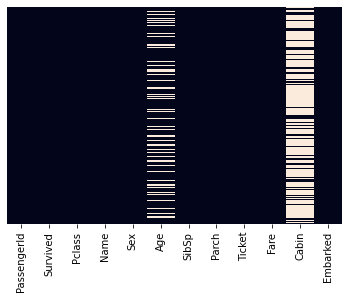

In [10]:
sns.heatmap(data=titanic_train.isnull(), yticklabels=False, cbar=False)

The above shows that the `Age` and `Cabin` columns have missing data. The proportion of missing data for each is:

In [20]:
age_proportion = sum(titanic_train['Age'].isnull()) / len(titanic_train['Age'])
cabin_proportion = sum(titanic_train['Cabin'].isnull()) / len(titanic_train['Cabin'])
print(" Age missing proportion: ", np.round(age_proportion, decimals=3), "\n",
      "Cabin missing proportion: ", np.round(cabin_proportion, decimals=3))

 Age missing proportion:  0.199 
 Cabin missing proportion:  0.771


There is a much larger proportion of missing cabin data than age data. The age missing proportion is amenable to filling in by imputation. Different imputation methods may change the performance of a trained algorithm. In order to assess these differences quickly and easily, we will start by training a simple logistic regression model as assessing its performance.

Import logistic regression.

In [21]:
from sklearn.linear_model import LogisticRegression

Instantiate a logistic regression model.

In [22]:
log_model = LogisticRegression()

### Modify the data set to fit the model.

Remove columns that will not be used for training.

In [25]:
titanic_train_new = titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_train_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


The `Pclass`, `Sex`, and `Embarked` columns are categorical variables that need to be modified with dummy variables in order to train the logistic regression model.

In [31]:
pclass_dummies = pd.get_dummies(titanic_train_new['Pclass'], prefix="Pclass", drop_first=True)

In [23]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
X = titanic_train[['Pclass', 'Name', '']]